# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
!pip3 install --upgrade pandas

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame'
merge_df = pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")


# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()
number_mice

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_id = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
                                       

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_clean = merge_df.drop_duplicates(subset=["Mouse ID"])

In [9]:
# Checking the number of mice in the clean DataFrame.
merge_df_clean["Mouse ID"].nunique()

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_drug = merge_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_value = group_by_drug["Tumor Volume (mm3)"].mean()
tumor_median = group_by_drug["Tumor Volume (mm3)"].median()
tumor_var = group_by_drug["Tumor Volume (mm3)"].var()
tumor_std = group_by_drug["Tumor Volume (mm3)"].std()
tumor_sem = group_by_drug["Tumor Volume (mm3)"].sem()





In [19]:
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [20]:
summary_stat = pd.DataFrame({"Mean tumor value":tumor_value,"Median tumer value":tumor_median,
                             "Tumor volume variance":tumor_var,"Tumor volume Standard Deviation":tumor_std,
                            "Tumor volume SEM":tumor_sem})
summary_stat

,Mean tumor value,Median tumer value,Tumor volume variance,Tumor volume Standard Deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
merge_df_advanced = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
merge_df_advanced

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

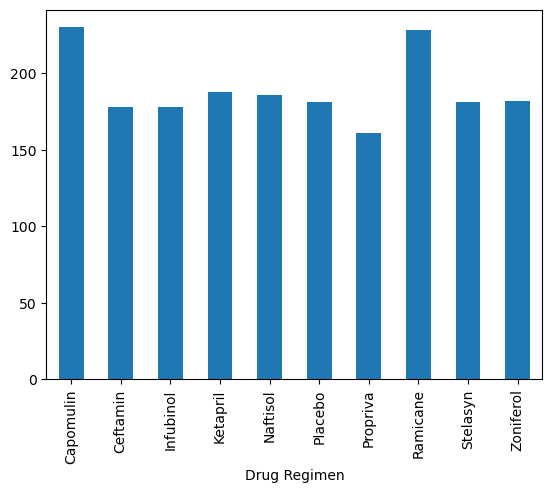

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_regimen = merge_df.groupby("Drug Regimen").size()
Drug_regimen.plot(kind="bar")


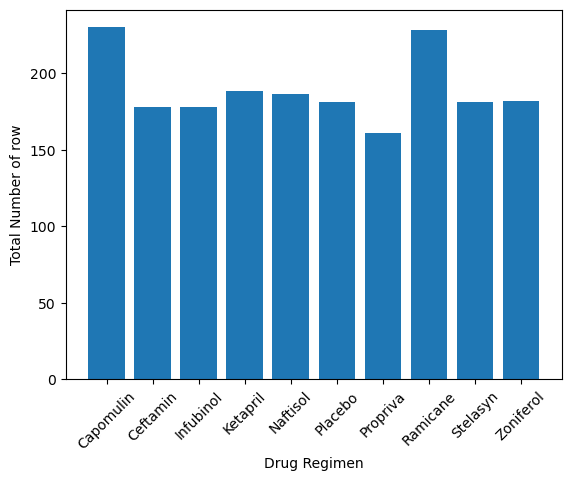

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_regimen = merge_df.groupby("Drug Regimen").size()
Drug_names = Drug_regimen.index.tolist()
Drug_values = Drug_regimen.values.tolist()
plt.bar(Drug_names,Drug_values)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of row")
plt.xticks(rotation = 45)
plt.show()

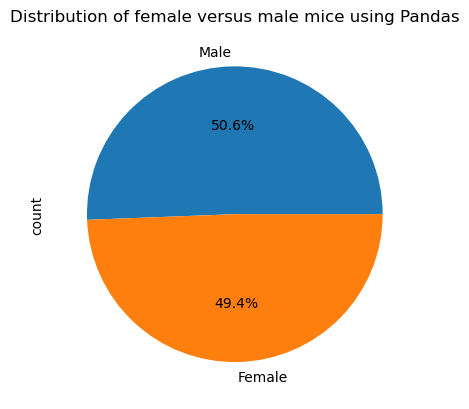

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
merge_count = merge_df.Sex.value_counts()
merge_count.plot.pie(autopct="%1.1f%%")
plt.title ("Distribution of female versus male mice using Pandas")
plt.show()


TypeError: can't multiply sequence by non-int of type 'float'

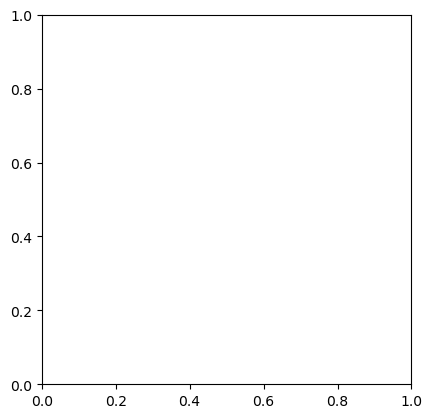

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
merge_labels = ["Female","Male"]
merge_sizes = merge_count.values
plt.pie(merge_sizes,merge_labels,autopct="%1.1f%%")
plt.title ("Distribution of female versus male mice using Pyplot")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_value = merge_df[merge_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_value.groupby("Mouse ID")["Timepoint"].max().reset_index(name="Greatest timepoint per mouse")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint = pd.merge(last_timepoint,merge_df,how="left",on="Mouse ID")
merge_timepoint

,Mouse ID,Greatest timepoint per mouse,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
809,z581,45,25,54.316407,2,Infubinol,Female,24,25
810,z581,45,30,56.286750,2,Infubinol,Female,24,25
811,z581,45,35,58.628399,3,Infubinol,Female,24,25
812,z581,45,40,60.053740,3,Infubinol,Female,24,25


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
Tumor_val_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    tumor_volumes = merge_timepoint.loc[merge_timepoint["Drug Regimen"]==t,"Tumor Volume (mm3)"]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    cuars = tumor_volumes.quantile([.25,.5,.75])
    low = cuars[.25]
    high = cuars[.75]
    iqr = high-low
    
    # add subset 
    lower_bound = low - (1.5 * iqr)
    upper_bound = high + (1.5 * iqr)
    outlier = tumor_volumes.loc[(tumor_volumes<lower_bound)| (tumor_volumes>upper_bound)]
    Tumor_val_data.append(outlier)
    
    
    # Determine outliers using upper and lower bounds
    print(f" {t} outliers {outlier}")

 Capomulin outliers 601    25.472143
602    23.343598
Name: Tumor Volume (mm3), dtype: float64
 Ramicane outliers 354    22.050126
Name: Tumor Volume (mm3), dtype: float64
 Infubinol outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ceftamin outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


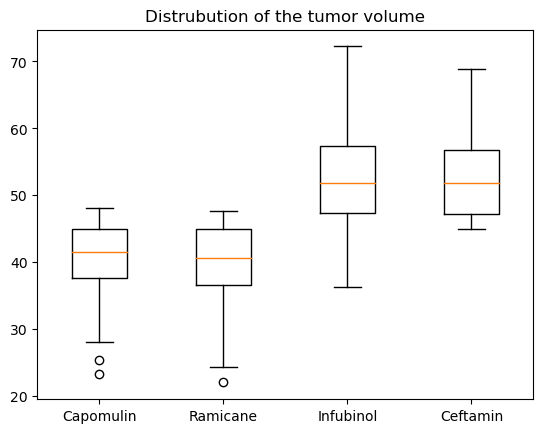

In [28]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
val_data = []

for t in treatments:
    tumor_volumes = merge_timepoint.loc[merge_timepoint["Drug Regimen"]==t,"Tumor Volume (mm3)"]
    val_data.append(tumor_volumes)
    
fig,ax=plt.subplots()
ax.boxplot( val_data,labels=treatments)

ax.set_title("Distrubution of the tumor volume")
plt.show()

## Line and Scatter Plots

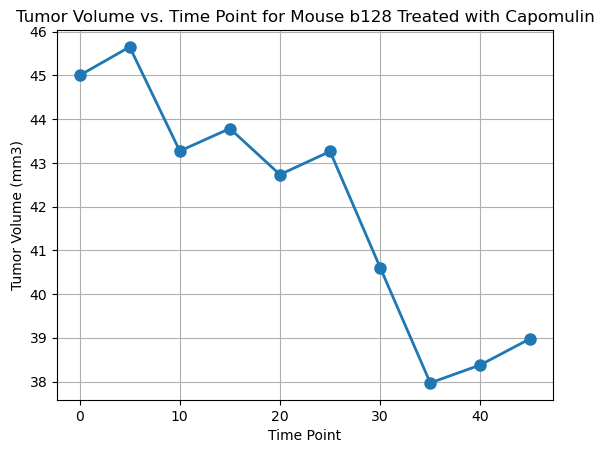

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = merge_df.loc[(merge_df["Drug Regimen"]=="Capomulin") & (merge_df["Mouse ID"] == "b128")]
time_points = single_mouse_data["Timepoint"]
tumor_volumes = single_mouse_data["Tumor Volume (mm3)"]

plt.plot(time_points, tumor_volumes, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Tumor Volume vs. Time Point for Mouse b128 Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

plt.show()

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']

avg_weight =capomulin_data.groupby('Mouse ID')['Weight (g)'].sum() / capomulin_data.groupby('Mouse ID')['Weight (g)'].count()

avg_tumor_volume =capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].sum() / capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].count()



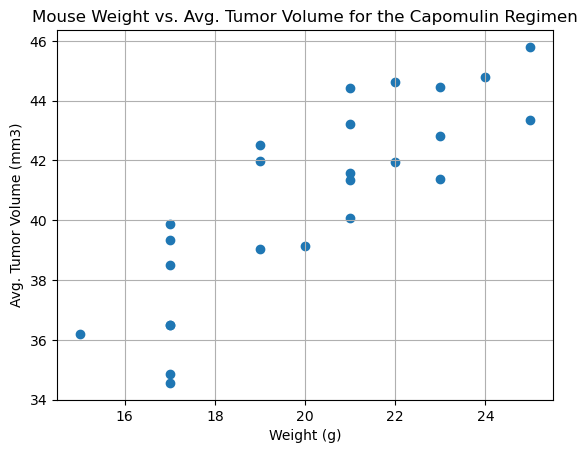

In [31]:
import matplotlib.pyplot as plt

plt.scatter(avg_weight, avg_tumor_volume)
plt.title('Mouse Weight vs. Avg. Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = avg_weight.corr(avg_tumor_volume)
correlation


0.8419363424694722

In [33]:
import seaborn as sb

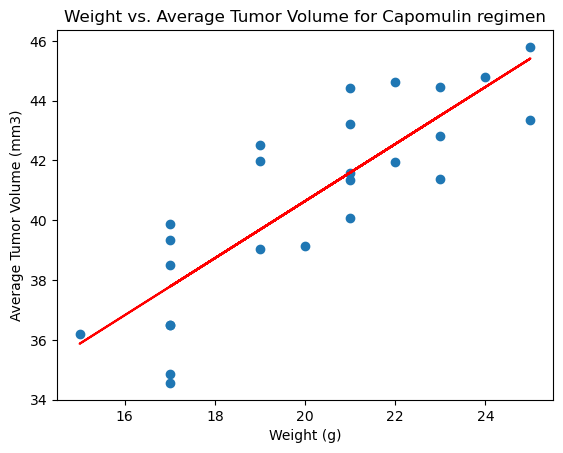

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_volume)

regress_values = avg_weight * slope + intercept

plt.scatter(avg_weight, avg_tumor_volume)
plt.plot(avg_weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume for Capomulin regimen")
plt.show()
